# Management and Analysis of Physics Dataset - mod.B

## Final project: Streaming processing of cosmic rays using Drift Tubes detectors

The goal of this project is to reproduce a real-time processing of real data collected in a particle physics detector and publish the results in a dashboard for live monitoring.

### Students:
* Conforto Filippo (2021856)
* Domenichetti Lorenzo (2011653)
* Faorlin Tommaso (2021857)

## Consumer notebook

In [1]:
import json
import pylab as pl
import numpy as np

from IPython import display

from kafka import KafkaConsumer

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
from kafka.admin import KafkaAdminClient, NewTopic
KAFKA_BOOTSTRAP_SERVERS='10.67.22.100:9092'
kafka_admin = KafkaAdminClient(
        bootstrap_servers=KAFKA_BOOTSTRAP_SERVERS,
    )

consumer = KafkaConsumer(bootstrap_servers=KAFKA_BOOTSTRAP_SERVERS,consumer_timeout_ms=100000)

consumer.subscribe('topic_results')

consumer.poll(timeout_ms=0,         #<<--- do not enable dead-times before one poll to the next
              max_records=None,     #<<--- do not limit the number of records to consume at once 
              update_offsets=True   #<<--- update the reading offsets on this topic
             )

{}

In [3]:
def rt_plot(js,num, fig,axes):
    
    #to delete the texts written during the previous update
    for txt in fig.texts:
        txt.set_visible(False)
    
    #label with informations on the right side of the window
    plt.figtext(1.01, 0.5, f'Batch N° {num}:\n\nHits: {js["hits"]} \n\n' + f'Channel 0: {js["hits_per_chamber"][0]} hits\n\n' + f'Channel 1: {js["hits_per_chamber"][1]} hits\n\n' + f'Channel 2: {js["hits_per_chamber"][2]} hits\n\n' + f'Channel 3: {js["hits_per_chamber"][3]} hits' 
                , ha='left', va='center', fontsize = 20, 
               bbox=dict(facecolor='snow', edgecolor='black', boxstyle='round'))
    
    #main title of the upper panel
    plt.figtext(0.5, 1.07, f'Muon-Hits Monitors', ha='center', va='center', fontsize = 30)
    plt.figtext(0.5, 1.025, f'Total active channels', ha='center', va='center', fontsize = 22)
                
    for i, ax in enumerate(axes[0]):
        #clean previous plots and update titles and labels
        ax.clear()
        ax.set_title(f'Chamber {i}', fontsize = 15)
        ax.set_xlabel("Channel N°", fontsize = 14)
        if i == 0:
            ax.set_ylabel("Counts", fontsize = 14)
        #bins centers computation
        bin_centers = js["hist_1"][str(i)]["bins"][:-1] + np.diff(js["hist_1"][str(i)]["bins"])/2
        ax.hist(bin_centers, weights=js["hist_1"][str(i)]["counts"], bins=js["hist_1"][str(i)]["bins"], alpha=0.6)
        ax.tick_params(labelsize=13)

    
    #main title of the lower panel
    plt.figtext(0.5, 0.75, 'Total number of active channels per orbit', ha='center', va='center', fontsize = 22)

    for i, ax in enumerate(axes[1]):
        #clean previous plots and update titles and labels
        ax.clear()
        ax.set_title(f'Chamber {i}', fontsize = 15)
        ax.set_xlabel("Orbit N°", fontsize = 14)
        if i == 0:
            ax.set_ylabel("Counts", fontsize = 14)
        #bins centers computation
        bin_centers = js["hist_2"][str(i)]["bins"][:-1] + np.diff(js["hist_2"][str(i)]["bins"])/2
        ax.hist(bin_centers, weights=js["hist_2"][str(i)]["counts"], bins=js["hist_2"][str(i)]["bins"], alpha=0.6)
        ax.tick_params(labelsize=13)
        #scientific notation on the x-axis labels
        ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0)) 
        
    #main title of the upper panel
    plt.figtext(0.5, 0.5, f'Total active channels for orbits with active scintillator', ha='center', va='center', fontsize = 22)
                
    for i, ax in enumerate(axes[2]):
        #clean previous plots and update titles and labels
        ax.clear()
        ax.set_title(f'Chamber {i}', fontsize = 15)
        ax.set_xlabel("Channel N°", fontsize = 14)
        if i == 0:
            ax.set_ylabel("Counts", fontsize = 14)
        #bins centers computation
        bin_centers = js["hist_3"][str(i)]["bins"][:-1] + np.diff(js["hist_3"][str(i)]["bins"])/2
        ax.hist(bin_centers, weights=js["hist_3"][str(i)]["counts"], bins=js["hist_3"][str(i)]["bins"], alpha=0.6)
        ax.tick_params(labelsize=13)

    
    #main title of the lower panel
    plt.figtext(0.5, 0.24, 'Drift time', ha='center', va='center', fontsize = 22)

    for i, ax in enumerate(axes[3]):
        #clean previous plots and update titles and labels
        ax.clear()
        ax.set_title(f'Chamber {i}', fontsize = 15)
        ax.set_xlabel("Time[s]", fontsize = 14)
        if i == 0:
            ax.set_ylabel("Counts", fontsize = 14)
        #bins centers computation
        bin_centers = js["hist_4"][str(i)]["bins"][:-1] + np.diff(js["hist_4"][str(i)]["bins"])/2
        ax.hist(bin_centers, weights=js["hist_4"][str(i)]["counts"], bins=js["hist_4"][str(i)]["bins"], alpha=0.6)
        ax.tick_params(labelsize=13)
        #scientific notation on the x-axis labels
        ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0)) 
     
    #to separate better the plots
    plt.tight_layout(h_pad = 7, w_pad = 1)
    
    #clean the whole screen and update with new incoming data
    display.clear_output(wait=True)
    display.display(pl.gcf())

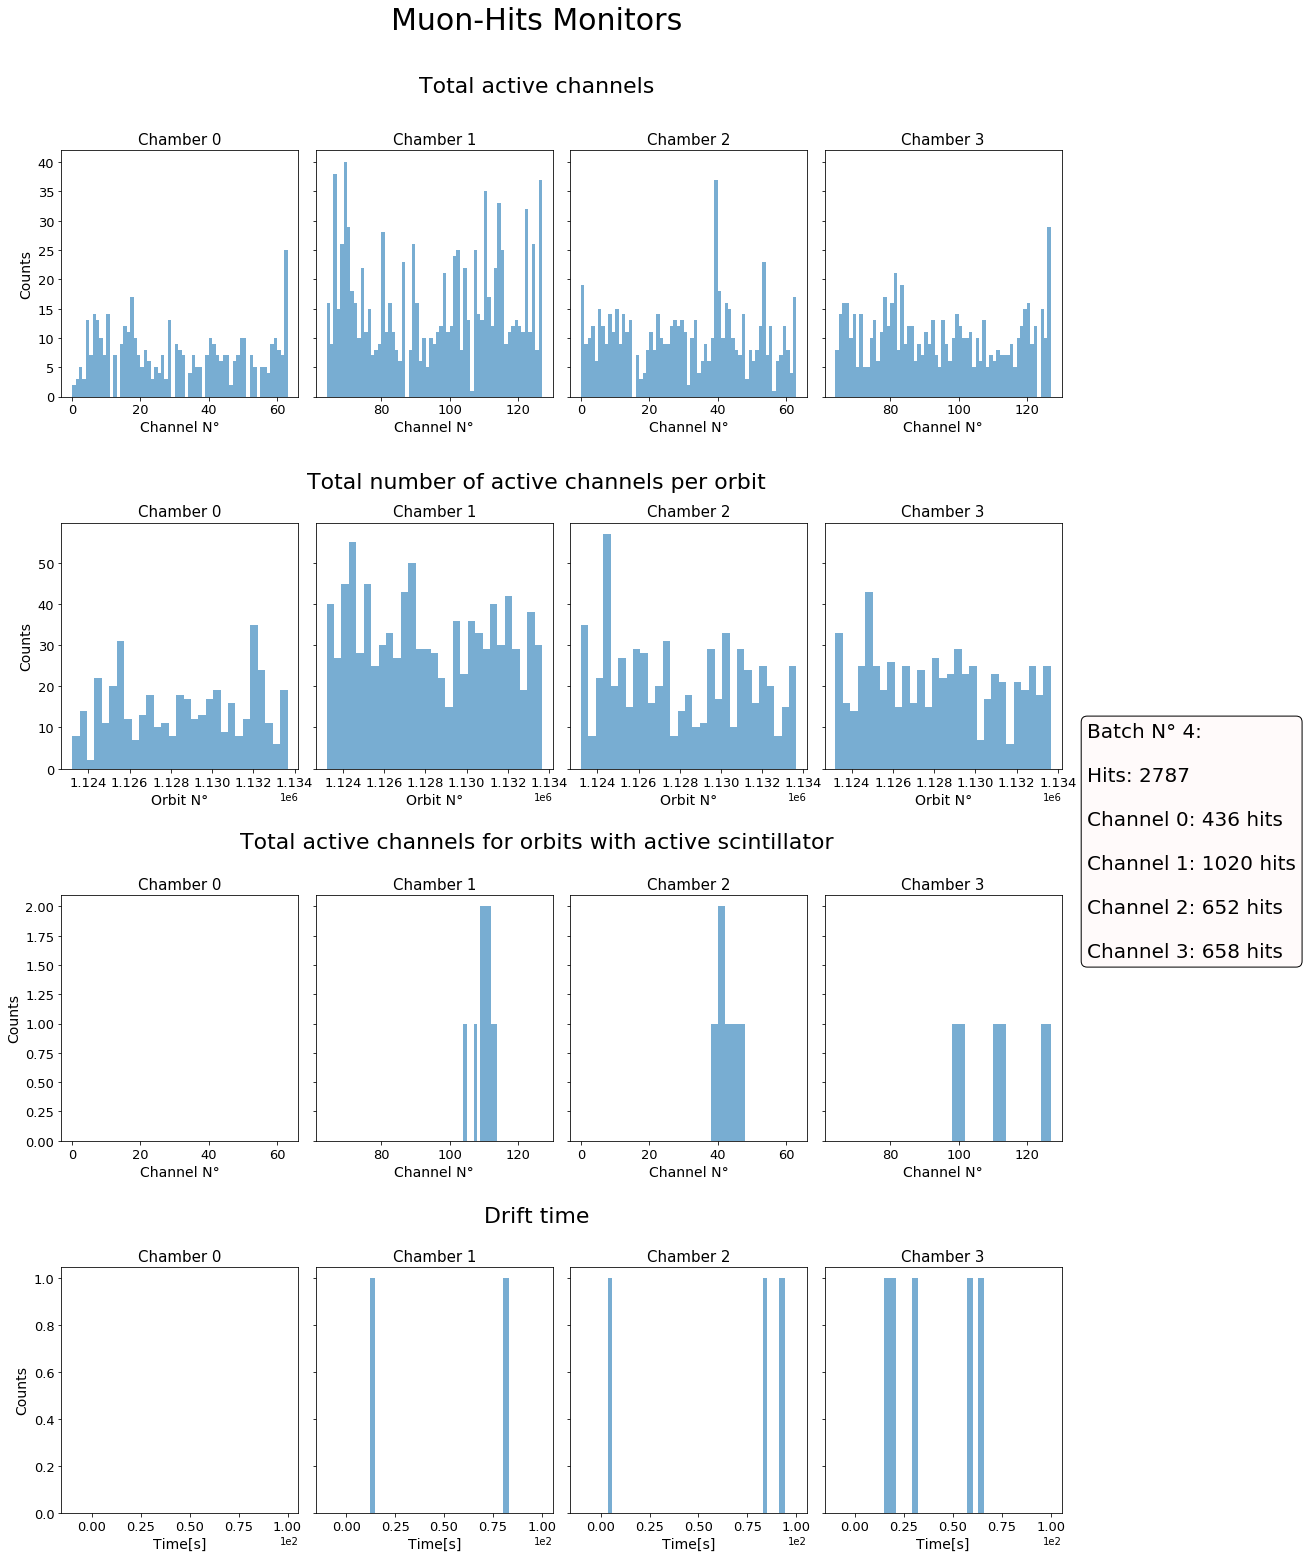

KeyboardInterrupt: 

In [ ]:
fig, axes = plt.subplots(4,4, figsize = (15,20), sharey = 'row')
for num,message in enumerate(consumer):
    rt_plot(json.loads(message.value),num,fig,axes)